# Homework #7

- 1. Взять все признаки из датасета load_boston(). Применить модель Random Forest.
- 2. Рассчитайте R2 на тренировочной и тестовой выборке.
- 3. Сравнить показатели качества новой модели с моделью с урока и сделать вывод.


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [14]:
#load data

boston_data = load_boston()

print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

In [16]:
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LSTAT    506 non-null    float64
 1   RM       506 non-null    float64
 2   PTRATIO  506 non-null    float64
 3   INDUS    506 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


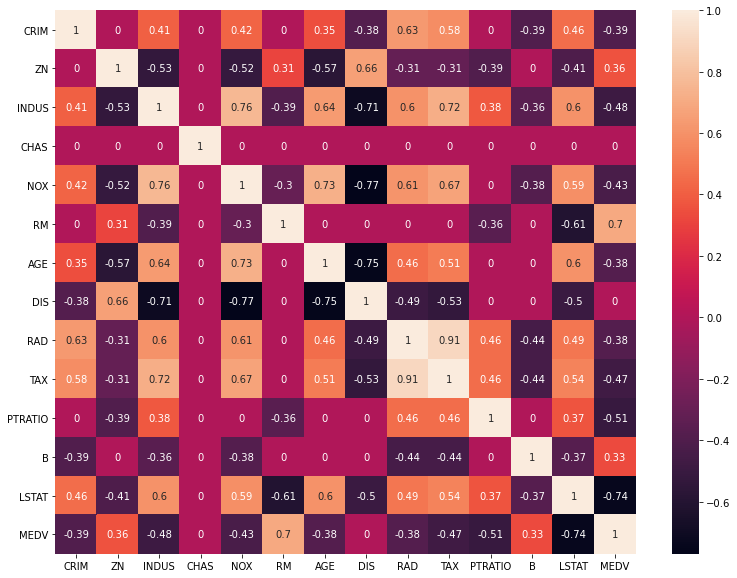

In [18]:
# create a correlation matrix to find imortant futures

x_corr = X.copy()
x_corr['MEDV'] = y
correlation_matrix = x_corr.corr().round(2)
correlation_matrix[np.abs(correlation_matrix) < 0.3] = 0

plt.subplots(figsize=(13, 10))
sns.heatmap(data=correlation_matrix, annot=True);

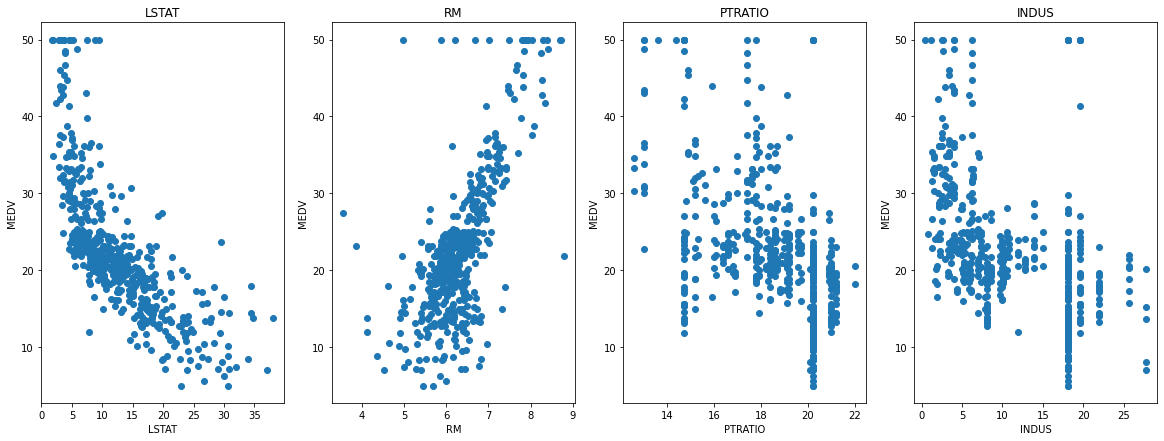

In [21]:


plt.figure(figsize=(20, 7))

features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(X[col], y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [22]:
X = X[['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
X.shape

(506, 4)

In [25]:
#split data to train, test

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [26]:
x_train.describe()

,LSTAT,RM,PTRATIO,INDUS
count,404.000000,404.000000,404.000000,404.000000
mean,12.478045,6.288455,18.425000,10.845124
std,7.038575,0.692931,2.193051,6.737307
min,1.730000,3.561000,12.600000,0.460000
25%,6.840000,5.888000,17.000000,5.130000
50%,11.160000,6.209000,19.000000,8.560000
75%,16.992500,6.629250,20.200000,18.100000
max,37.970000,8.780000,22.000000,27.740000


In [32]:
regr = RandomForestRegressor(random_state=1)

In [34]:
regr.fit(x_train, y_train)

pred_train = regr.predict(x_train)
pred_test = regr.predict(x_test)

In [35]:
print(f"Коэффициент детерминации (R^2) модели на обучающей выборке {r2_score(y_train, pred_train)}")
print(f"Коэффициент детерминации (R^2) модели на тестовой выборке {r2_score(y_test, pred_test)}")

Коэффициент детерминации (R^2) модели на обучающей выборке 0.9747036784841652
Коэффициент детерминации (R^2) модели на тестовой выборке 0.8463302372894165


Text(0, 0.5, 'Predicted price ($1000s)')

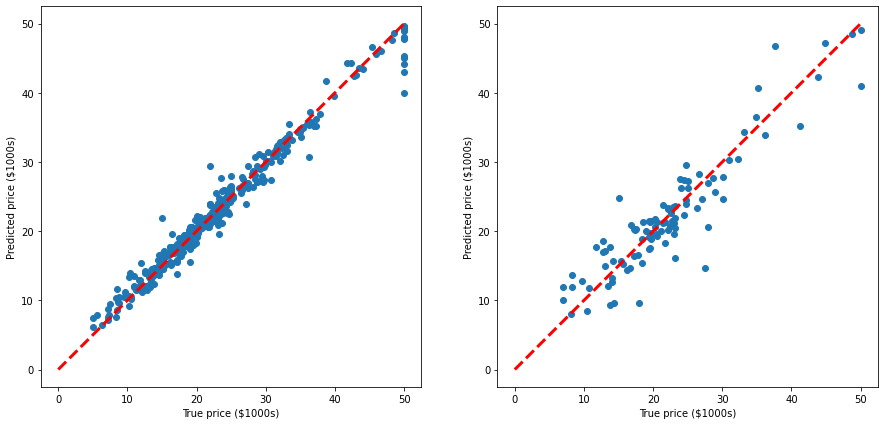

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].scatter(y_train, pred_train)
ax[0].plot([0, 50], [0, 50], '--k', color='red', linewidth=3)
ax[0].set_xlabel('True price ($1000s)')
ax[0].set_ylabel('Predicted price ($1000s)')

ax[1].scatter(y_test, pred_test)
ax[1].plot([0, 50], [0, 50], '--k', color='red', linewidth=3)
ax[1].set_xlabel('True price ($1000s)')
ax[1].set_ylabel('Predicted price ($1000s)')

## Исходя из полученных результатов можем сделать вывод, что модель RandomForest  предсказывает лучше чем линейная регрессия ращобранная на уроке